# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), și [sounddevice](https://python-sounddevice.readthedocs.io/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from typing import List, Tuple

# Generarea unui semnal sinusoidal

Întâi trebuie să definim parametrii sinusoidei continuue:

* orizontul de timp ($t$)
* frecvența semnalului original ($f_0$)
* amplitudinea ($A$)
* faza ($\varphi$)

In [2]:
time_of_view = 1     # s
frequency = 2        # Hz
amplitude = 1
phase = 0

Iar apoi parametrii de măsurare, sinusoida discretizată:
* frecvența de eșantionare ($f_s$)
* perioada de eșantionare ($t_s$)
* numărul de eșantionare ($n$)

In [3]:
sampling_rate = 12    # Hz
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period

Cu datele de mai sus putem genera orizontul de timp cu momentele de interes pentru semnalul continuu și cel discretizat ($t$, respectiv $nt_s$):

In [4]:
atime = np.linspace (0, time_of_view, int(10e5 + 1)) # s.
time = np.linspace (0, time_of_view, int(n_samples + 1))

*Observație*: orizontul de timp continuu (analog) este de fapt un orizont de timp discret ($nt_s$) foarte dens ($n=10^5$ eșantione).

Cu aceste date putem crea o funcție sinus ce generează sinusoidele parametrizate conform variabilelor de mai sus:

In [5]:
def sine (amplitude, frequency, time, phase):
    return amplitude * np.sin (2 * np.pi * frequency * time + phase)

## Sinusoidă continuă
Pentru a obține o sinusoidă "continuă" putem apela funcția ```sine```:

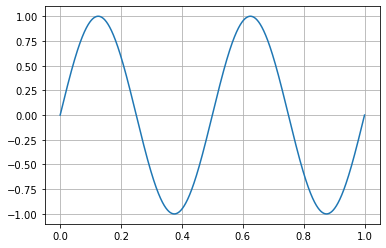

In [6]:
asignal = sine(amplitude, frequency, atime, phase)

plt.grid(True)
plt.plot (atime, asignal)

## Sinusoidă discretizată
Discretizarea se obține apelând aceiași funcție ```sine``` dar cu parametrii discreți și folosind ```stem``` pentru a obține cele $n$ eșantioane:

<StemContainer object of 3 artists>

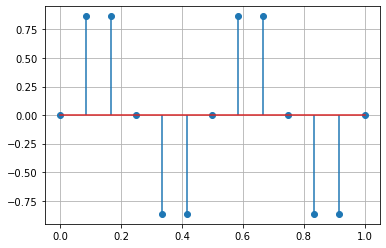

In [7]:
signal = sine(amplitude, frequency, time, phase)

plt.grid(True)
plt.stem (time, signal)

# Producerea și audiția unui ton

Pentru a produce o sinusoidă ce poate fi percepută de urechea umană trebuie să creștem frecvența și amplitudinea acesteia.

În exemplul de mai jos generăm o sinusoidă de frecvență $f_0=440\text{Hz}$ și amplitudine $10.000$ pe care o discretizăm cu frecvența de eșantionare $f_s=44.100\text{Hz}$ pe un orizont de timp de $2\text{s}$.

In [8]:
time_of_view = 2     # s
frequency = 440      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

tone = sine(amplitude, frequency, time, phase)

Aceast ton îl vom discretiza cu o frecvență de eșantionare $f_s$ conform ```sampling_rate``` și îl vom transforma în formatul WAV prin conversia eșantioanelor la întregi pe 16-biți:

In [9]:
sd.default.samplerate = sampling_rate
wav_wave = np.array(tone, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

# Sarcini

1. [8p] Scrieți tonurile pentru notele muzicale Do, Re, Mi, Fa, Sol, La, Si, Do.

2. [8p] Compuneți un cântec simplu clasic (ex. Frère Jacques) într-un singur semnal.

3. [4p] Citiți o partitură la intrare (folosind [LilyPond](https://lilypond.org/) sau formatul propriu) și produceți semnalul ce conține melodia la ieșire prin compunerea tonurilor asociate notelor automat.

# Exercitiul 1

In [11]:
note_frequency = {
    "": 0,
    "do": 261.63,
    "do#": 277.18,
    "re": 293.66,
    "re#": 311.13,
    "mi": 329.63,
    "fa": 349.23,
    "fa#": 369.99,
    "sol": 392.00,
    "sol#": 415.3,
    "la": 440.00,
    "la#": 466.16,
    "si": 493.88,
    "doo": 523.28,
}

SAMPLING_RATE = 44100
SAMPLING_PERIOD = 1./SAMPLING_RATE

def make_tone(frequency, duration=0.5, amplitude=10000) -> np.ndarray:
    n_samples = duration/SAMPLING_PERIOD
    time = np.linspace(0, duration, int(n_samples + 1))
    tone = sine(amplitude, frequency, time, 0)
    return tone

def make_melody(melody: List[Tuple[str, int]], speed=0.25) -> np.ndarray:
    tones = []
    for note, tact in melody:
        tone = make_tone(
            note_frequency[note],
            tact * speed
        )
        tones.append(tone)
    return np.concatenate(tones)

def play_sound(tone):
    sd.default.samplerate = SAMPLING_RATE
    wav_wave = np.array(tone, dtype=np.int16)
    sd.play(wav_wave, blocking=True)
    sd.stop()

In [12]:
# Task 1
m = make_melody(
    [
        ("do", 1),
        ("re", 1),
        ("mi", 1),
        ("fa", 1),
        ("sol", 1),
        ("la", 1),
        ("si", 1),
        ("doo", 1),
    ],
    speed=1/2
)

play_sound(m)

# Exercitiul 2

In [13]:
# Task 2
# https://cdn3.virtualsheetmusic.com/images/first_pages/BIG/Miscellaneous/FrerePfFREEFirst_BIG.gif

frere_jacques = make_melody(
    [
        ("do", 1),
        ("re", 1),
        ("mi", 1),
        ("do", 1),
        ("do", 1),
        ("re", 1),
        ("mi", 1),
        ("do", 1),
        ("mi", 1),
        ("fa", 1),
        ("sol", 2),
        ("mi", 1),
        ("fa", 1),
        ("sol", 2),
        ("sol", 1),
        ("fa", 1),
        ("mi", 1),
        ("do", 1),
        ("sol", 1),
        ("fa", 1),
        ("mi", 1),
        ("do", 1),
        ("do", 4),
        ("do", 4),
    ],
    speed=60/92
)

play_sound(frere_jacques)

# Exercitiul 3

Definim notele in formatul standard, vizibil [aici](http://techlib.com/reference/musical_note_frequencies.htm).

Pentru a calcula frecventele, ne bazam pe faputul ca pe scara logaritmica, diferenta intre doua note consecutive este de $\sqrt[12]{2}$.
Presupunem ca avem $5$ octave, cu $A$ din octava $1$ la frecventa de $55.0$ Hz.


In [14]:
import math

# List with the notes.
notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'E#', 'F', 'F#', 'G']

# Note by frequency for the base octave.
base_octave_frequency_by_note = dict()

base_frq, base_multiplier = 55.0, math.pow(2, 1/12)

for note in notes:
    base_octave_frequency_by_note[note] = base_frq
    base_frq *= base_multiplier


def compute_note_frequency(note: str, octave: int):
    """
    Returns the frquency of a note, given the octave (indexed from 1)
    """
    return base_octave_frequency_by_note[note] * 2**(octave-1)

print(compute_note_frequency('D#', 3))


311.126983722081


## Citire din Fisier

Pentru a citi o partitura dintr-un fisier, facem urmatoarele conventii:

Prima linie contine tempo-ul in BPM al unei patrimi.

Fiecare linie contine o lista de note, urmata de indicele ei de durata.
Un indice de $x$ inseamna ca notele vor avea o durata egala cu $\frac{1}{2^x}$ dintr-o nota intreaga.

E.g.:
```
90
A1 C1 D#2 10 -- 3 note, 10 batai
20           -- nicio nota (pauza) 20 de batai
```


In [15]:
def read_melody_from_file(filename: str) -> Tuple[int, List[Tuple[List[str], int]]]:
    """
        Reads a melody from a file.
        Returns:
          * BPM of a FULL note
          * List of each timestamp:
            * List of the notes
            * beats duration
    """
    lines = open(filename, "r").readlines()
    
    lines = [l.strip() for l in lines]
    lines = [l for l in lines if l != '' and l[0] != '#']
    
    bpm = int(lines[0])
    notes = [(lin.split()[:-1], int(lin.split()[-1])) for lin in lines if lin != '']

    return bpm, notes

def make_tone(frequency, duration, amplitude=4000) -> np.ndarray:
    """
      Makes a tone.
      This function is taken from b)
    """
    n_samples = duration / SAMPLING_PERIOD
    time = np.linspace(0, duration, int(n_samples + 1))
    tone = sine(amplitude, frequency, time, 0)
    return tone

def make_melody(bpm, melody: List[Tuple[List[str], int]]) -> np.ndarray:
    """
        Creates a melody from a given bpm and melody as notes.
    """
    tones = []
    duration_hole_note = 60 / bpm * 4
    print("duration of quarter: ", duration_hole_note / 4)
    for notes, duration in melody:
        duration_seconds = duration_hole_note * 1/duration
        n_samples = duration_seconds / SAMPLING_PERIOD
        # print("n_samples: ", n_samples)
        tone = np.linspace(0, 0, int(n_samples + 1))
        
        for note in notes:
            frq_note = compute_note_frequency(note[:-1], int(note[-1]))
            tone_note = make_tone(frq_note, duration_seconds)
            tone += tone_note

        tones.append(tone)
    return np.concatenate(tones)

In [16]:
melody = make_melody(*read_melody_from_file("tema-1-ex-3.txt"))
play_sound(melody)

duration of quarter:  0.6666666666666666
